<a href="https://colab.research.google.com/github/d1m3j1/Machine-Learning/blob/main/Proving_Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Proving Moores Law With Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf

In [ ]:
!wget  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv 

--2021-03-17 20:23:48--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-17 20:23:48 (50.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
#Load in the data
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]


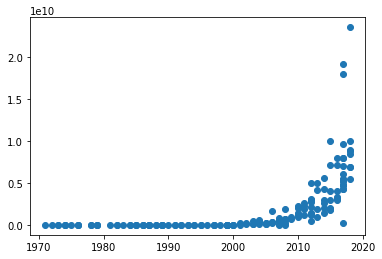

In [ ]:
#Plotting the Exponential data
plt.scatter(X,y)

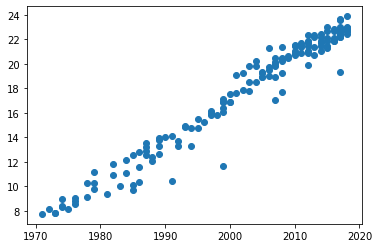

In [ ]:
#Taking the log to make it a Linear Model
Y = np.log(y)
plt.scatter(X,Y)

In [ ]:
X = X -X.mean()

In [ ]:
#Creating Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')

#Learning rate schedule
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model
r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])


Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 582.4675
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 482.0088
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 376.8435
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 471.3312
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 203.4743
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 161.0696
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 97.9264
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 87.7670
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 63.4877
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 59.1177
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 38.1372
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 27.8644
Epoch 13/200
6/6 [=========================

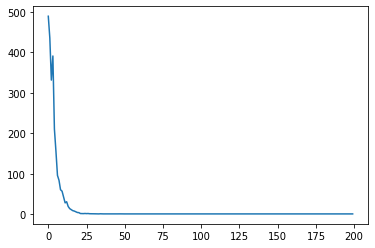

In [ ]:
plt.plot(r.history['loss'], label ='loss')

In [ ]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34652776]], dtype=float32), array([17.783804], dtype=float32)]


In [ ]:
#The slope of the line is
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.34652776


In [ ]:
print('Time to double:', np.log(2)/a)

Time to double: 2.000264538807119


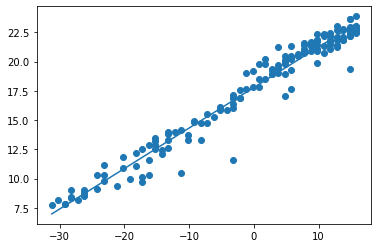

In [ ]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [ ]:
#Manual Calculations

#Get weights
w, b = model.layers[0].get_weights()

#Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N * 1) * (1 * 1) + (1) --> (N * 1)
Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.